In [1]:
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

In [6]:
y = df['median_house_value']
X = df.drop(['median_house_value'], axis=1)
X.head(n=3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY


In [7]:
y.head(n=3)

,median_house_value
0,452600.0
1,358500.0
2,352100.0


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

In [8]:
y_eda = df["median_house_value"] #Выделяем цп
X_eda = df.drop(columns=["median_house_value"]) #формируем матрицу признаков X, исключив целевую переменную,

In [9]:
X_eda.describe(include='all') #Описательная статистика по всем признакам

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,NaN



1. АНАЛИЗ MEDIAN_HOUSE_VALUE


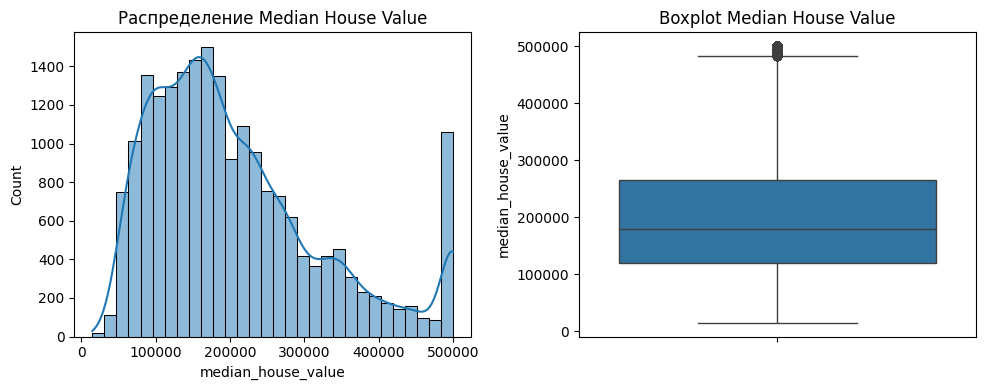

Описательные статистики Median House Value:
Минимум: $14,999.0
Максимум: $500,001.0
Среднее: $206,855.82
Медиана: $179,700.0
Стандартное отклонение: $115,395.62


In [10]:
# 1. Анализ целевой переменной
print("\n1. АНАЛИЗ MEDIAN_HOUSE_VALUE")

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(y, kde=True, bins=30)
plt.title('Распределение Median House Value')

plt.subplot(1, 3, 2)
sns.boxplot(y=y)
plt.title('Boxplot Median House Value')

plt.tight_layout()
plt.show()

# Статистики целевой переменной
print(f"Описательные статистики Median House Value:")
print(f"Минимум: ${y.min():,}")
print(f"Максимум: ${y.max():,}")
print(f"Среднее: ${y.mean():,.2f}")
print(f"Медиана: ${y.median():,}")
print(f"Стандартное отклонение: ${y.std():,.2f}")

На гистограмме наблюдается правосторонняя асиметрия распределения с длинным хвостом в область высоких значений. Средняя стоимость домов превышает медианное значение, что подтверждает наличие дорогих объектов, смещающих среднее вверх. Стандартное отклонение свидетельствует о значительном разбросе цен на рынке недвижимости. Наличие выбросов в области высоких цен характерно для рынка недвижимости и соответствует реальному распределению элитного жилья.

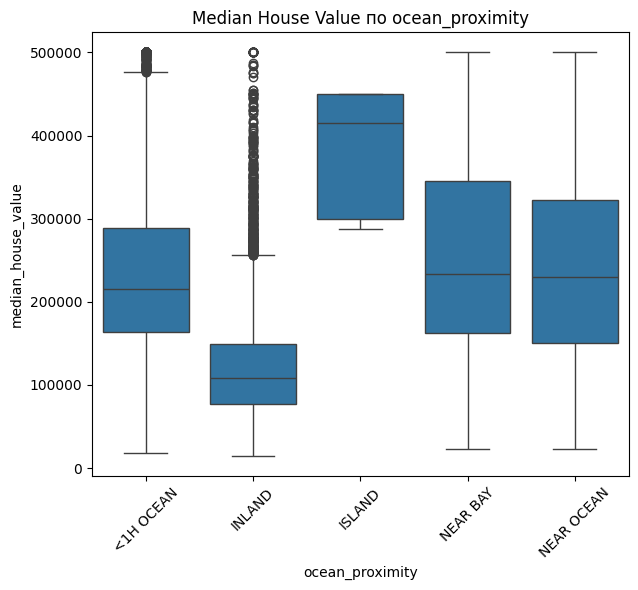


Статистический анализ по категориям:

ocean_proximity:
                          mean            std  count
ocean_proximity                                     
<1H OCEAN        240084.285464  106124.292213   9136
INLAND           124805.392001   70007.908494   6551
ISLAND           380440.000000   80559.561816      5
NEAR BAY         259212.311790  122818.537064   2290
NEAR OCEAN       249433.977427  122477.145927   2658


/tmp/ipython-input-132276218.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(col)[y.name].agg(['mean', 'std', 'count'])


In [11]:
#Связь целевой переменной с категориальными признаками
categorical_cols = ['ocean_proximity']

plt.figure(figsize=(12, 6))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)

    sns.boxplot(data=df, x=col, y=y)
    plt.title(f'Median House Value по {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Статистический анализ
print("\nСтатистический анализ по категориям:")
for col in categorical_cols:
    grouped = df.groupby(col)[y.name].agg(['mean', 'std', 'count'])
    print(f"\n{col}:")
    print(grouped)

Стоимость домов варьируется в зависимости от локации. Наиболее дорогая недвижимость расположена на островах (ISLAND), однако выборка составляет всего 5 объектов. Прибрежные районы (NEAR BAY, NEAR OCEAN, <1H OCEAN) демонстрируют схожие ценовые характеристики в диапазоне 240,000-260,000. Внутренние районы (INLAND) значительно дешевле - средняя цена 124,805

Вывод: география влияет на цену.


1. КОРРЕЛЯЦИЯ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
Корреляции с median_house_value:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

2. ГРАФИКИ РАССЕЯНИЯ ДЛЯ ТОП-4 ПРИЗНАКОВ
Топ-4 признака: ['median_income', 'latitude', 'total_rooms', 'housing_median_age']


<Figure size 1000x800 with 0 Axes>

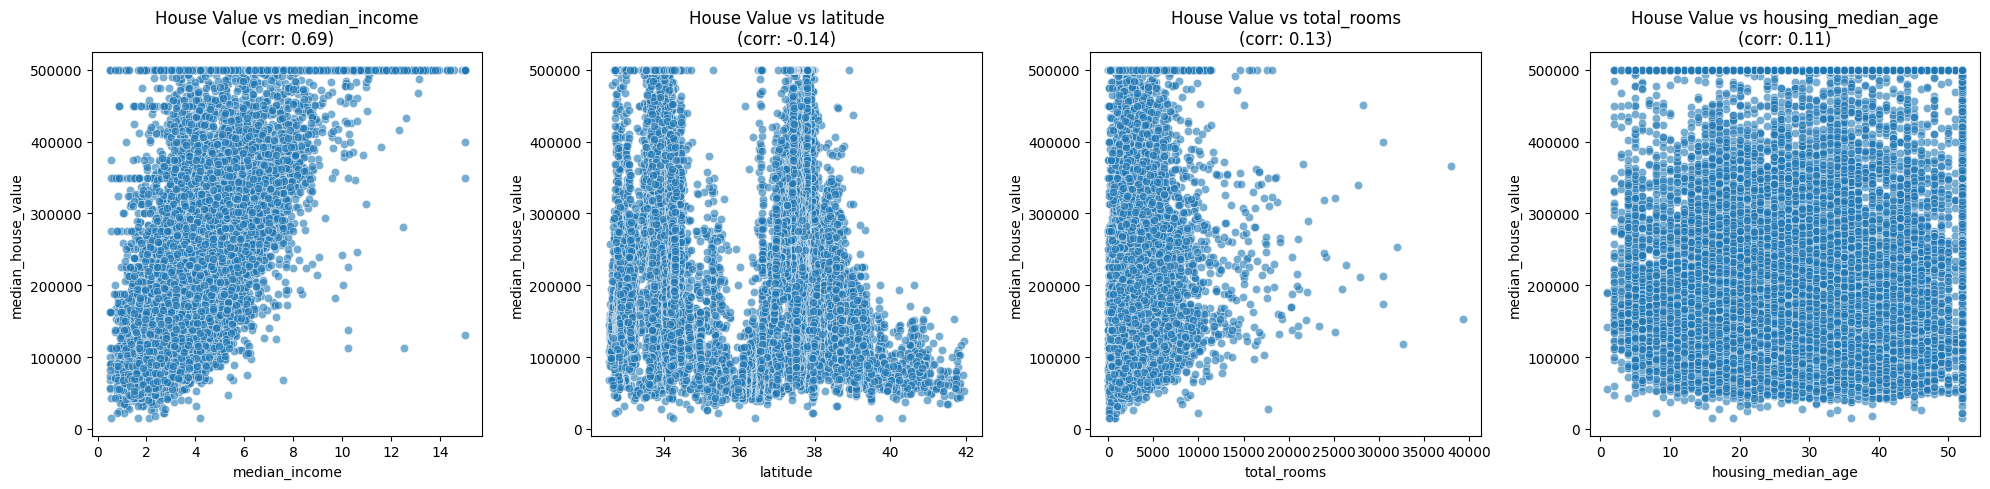


3. РАСПРЕДЕЛЕНИЕ КЛЮЧЕВЫХ ПРИЗНАКОВ


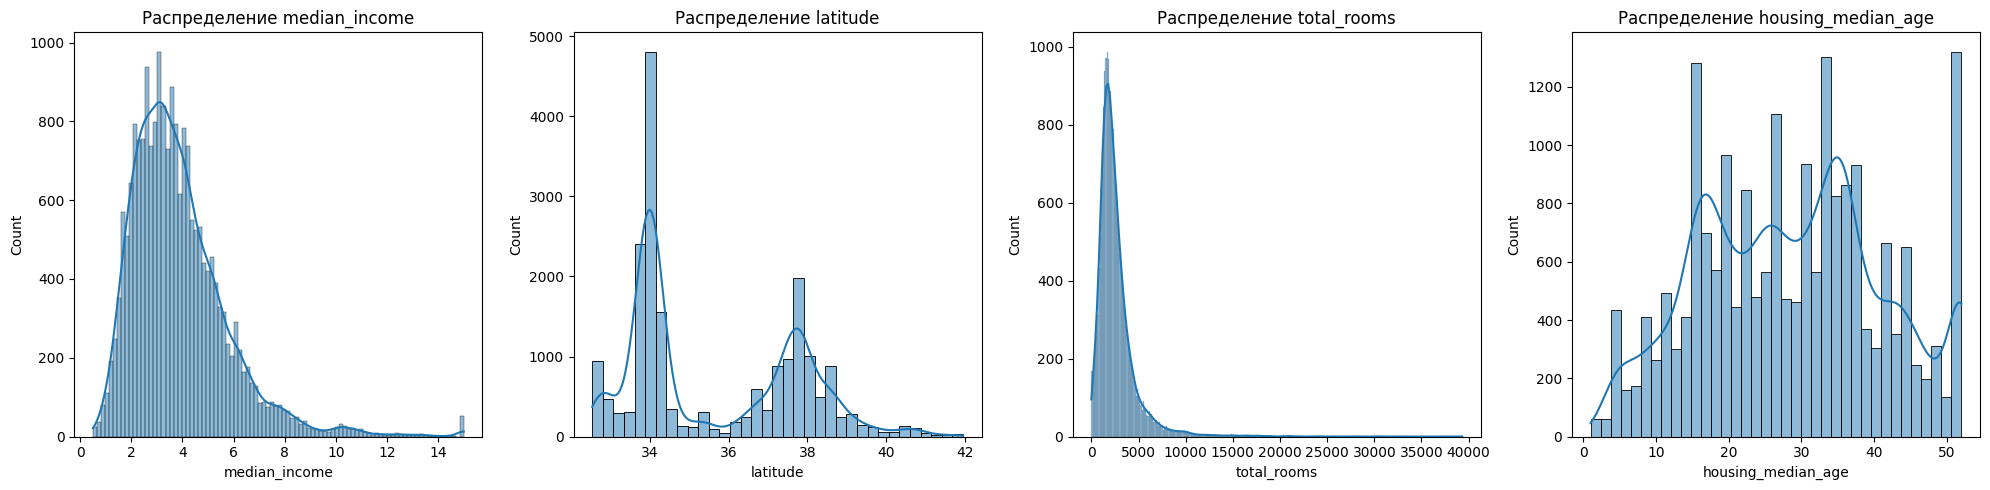


4. ПОЛНАЯ КОРРЕЛЯЦИОННАЯ МАТРИЦА


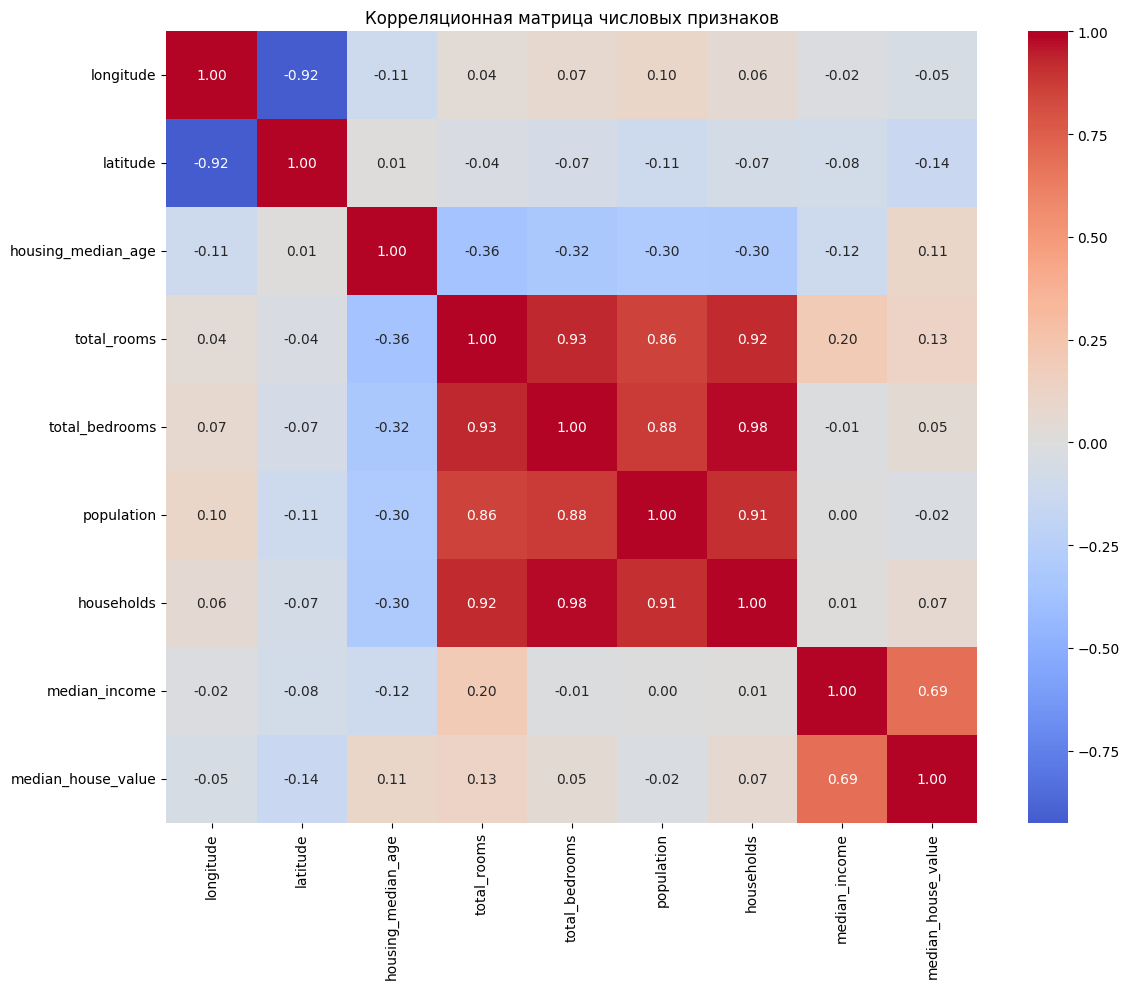

In [12]:
# Связь целевой переменной с числовыми признаками
numerical_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                  'total_bedrooms', 'population', 'households', 'median_income']

# Кореляционная матрица
print("\n1. КОРРЕЛЯЦИЯ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ")
plt.figure(figsize=(10, 8))
correlation_with_target = df[numerical_cols + ['median_house_value']].corr()['median_house_value'].sort_values(ascending=False)
print("Корреляции с median_house_value:")
print(correlation_with_target)

# Графики рассеяния
print("\n2. ГРАФИКИ РАССЕЯНИЯ ДЛЯ ТОП-4 ПРИЗНАКОВ")
correlation_abs = correlation_with_target.drop('median_house_value').abs()
top_features = correlation_abs.nlargest(4).index
print(f"Топ-4 признака: {list(top_features)}")

plt.figure(figsize=(20, 5))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(data=df, x=feature, y='median_house_value', alpha=0.6)
    plt.title(f'House Value vs {feature}\n(corr: {correlation_with_target[feature]:.2f})')
plt.tight_layout()
plt.show()

# Распределение ключевых признаков
print("\n3. РАСПРЕДЕЛЕНИЕ КЛЮЧЕВЫХ ПРИЗНАКОВ")
plt.figure(figsize=(20, 5))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 4, i)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Распределение {feature}')
plt.tight_layout()
plt.show()

# Полная кореляционная матрица
print("\n4. ПОЛНАЯ КОРРЕЛЯЦИОННАЯ МАТРИЦА")
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols + ['median_house_value']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Корреляционная матрица числовых признаков')
plt.tight_layout()
plt.show()

Сильные связи: median_income.
Вывод: доход населения - главный фактор цены.

Слабые положительные связи: total_rooms,housing_median_age, households,         total_bedrooms. Вывод: характеристики домов слабо влияют на цену

Отрицательные связи: latitude: Чем севернее, тем дешевле; longitude: Слабая отрицательная; population:Чем больше людей, тем немного дешевле

Главный вывод:

Корреляционный анализ выявил доминирующее влияние среднего дохода на стоимость недвижимости. Неожиданным результатом является отрицательная корреляция с широтой, что может объясняться региональными особенностями распределения престижных районов в Калифорнии.

In [13]:
# Борьба с пропусками
print("ОБРАБОТКА ПРОПУСКОВ:")

# Проверяем пропуски во всех колонках
missing_data = df.isnull().sum()
print("Пропуски по колонкам:")
for col, missing_count in missing_data.items():
    if missing_count > 0:
        print(f"  {col}: {missing_count} пропусков")

# Обрабатываем пропуски в total_bedrooms
total_bedrooms_missing = df['total_bedrooms'].isnull().sum()
print(f"\nПропусков в total_bedrooms: {total_bedrooms_missing}")

if total_bedrooms_missing > 0:
    # Заполняем медианным значением по ocean_proximity
    df['total_bedrooms'] = df.groupby('ocean_proximity')['total_bedrooms'].transform(
        lambda x: x.fillna(x.median())
    )
    print(f"Заполнено {total_bedrooms_missing} пропусков в total_bedrooms медианами по ocean_proximity")
else:
    print("Пропусков в total_bedrooms не обнаружено")

final_missing = df.isnull().sum().sum()
print(f"Общее количество пропусков после обработки: {final_missing}")

ОБРАБОТКА ПРОПУСКОВ:
Пропуски по колонкам:
  total_bedrooms: 207 пропусков

Пропусков в total_bedrooms: 207
Заполнено 207 пропусков в total_bedrooms медианами по ocean_proximity
Общее количество пропусков после обработки: 0


/tmp/ipython-input-1012091842.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['total_bedrooms'] = df.groupby('ocean_proximity')['total_bedrooms'].transform(


In [14]:
categorical_features = ['ocean_proximity']

numeric_features = ['median_income', 'latitude', 'housing_median_age', 'total_rooms']

best_features = categorical_features + numeric_features

## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [15]:
# Создаем копию данных для работы
df_work = df.copy()

# Логарифмируем целевую переменную и асимметричные признаки
df_work['log_median_house_value'] = np.log(df_work['median_house_value'])
df_work['log_median_income'] = np.log(df_work['median_income'])
df_work['log_total_rooms'] = np.log(df_work['total_rooms'] + 1)  # +1 чтобы избежать log(0)

# # Визуализируем разницу
# plt.figure(figsize=(15, 4))

# plt.subplot(1, 3, 1)
# sns.histplot(df_work['median_house_value'], kde=True)
# plt.title('Исходная цена\n(skew: {:.2f})'.format(df_work['median_house_value'].skew()))

# plt.subplot(1, 3, 2)
# sns.histplot(df_work['log_median_house_value'], kde=True)
# plt.title('Логарифмированная цена\n(skew: {:.2f})'.format(df_work['log_median_house_value'].skew()))

# plt.subplot(1, 3, 3)
# sns.histplot(df_work['log_median_income'], kde=True)
# plt.title('Логарифмированный доход\n(skew: {:.2f})'.format(df_work['log_median_income'].skew()))

# plt.tight_layout()
# plt.show()

# Подготавливаем данные для моделей
X = df_work.drop(['median_house_value', 'log_median_house_value'], axis=1)  # исключаем целевую
y = df_work['log_median_house_value']  # используем логарифмированную целевую

print(f"\nДанные подготовлены для моделей")
print(f"Размерность X: {X.shape}, y: {y.shape}")


Данные подготовлены для моделей
Размерность X: (20640, 11), y: (20640,)


In [17]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["ocean_proximity"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [18]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [19]:
encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [20]:
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [21]:
X = X.drop('ocean_proximity', axis=1) if 'ocean_proximity' in X.columns else X # убираем базовую колонку
X = pd.concat([X, X_encoded], axis=1) if 'ocean_proximity_<1H OCEAN' not in X.columns else X # оставляем 5 разных колонок
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,log_median_income,log_total_rooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,2.119287,6.781058,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,2.116424,8.867850,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,1.982022,7.291656,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,1.730434,7.150701,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,1.347086,7.395108,0.0,0.0,0.0,1.0,0.0


In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(
    fit_intercept=True, # считать свободный коэффициент B
    copy_X=True, # Глубокое копирование матрицы X, чтобы не модифицировать
    n_jobs=None, # None - 1 ядро используем
    positive=False, # все weight могут быть как положительными, так и отрицательными
)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Данные стандартизированы")
print(f"Размерность X_scaled_df: {X_scaled_df.shape}")

# Обучаем модель на подготовленных данных
model.fit(X_scaled_df, y)

Данные стандартизированы
Размерность X_scaled_df: (20640, 15)


LinearRegression()

### Преобразование числовых

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"Результат: {X_scaled_df.shape}")
print("StandardScaler успешно применен!")
print("\nПервые 5 строк после стандартизации:")
X_scaled_df.head()

Результат: (20640, 15)
StandardScaler успешно применен!

Первые 5 строк после стандартизации:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,log_median_income,log_total_rooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972511,-0.974429,-0.977033,2.344766,1.858786,-1.131133,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.357115,0.861439,1.669961,2.332238,1.852703,1.651357,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.827058,-0.820777,-0.843637,1.782699,1.567130,-0.450310,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.719757,-0.766028,-0.733781,0.932968,1.032566,-0.638257,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.612456,-0.759847,-0.629157,-0.012881,0.218044,-0.312370,-0.891156,-0.681889,-0.015566,2.830742,-0.384466


### Модель

In [25]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Функция для вычисления метрик
def calculate_metrics(y_true, y_pred, dataset_name=""):
    if dataset_name:
        print(f"\n{dataset_name}:")

    MAE = mean_absolute_error(y_true, y_pred)
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)

    print(f"MAE = {MAE:,.3f}")
    print(f"MAPE = {MAPE:.3f} ({MAPE*100:.1f}%)")
    print(f"R² = {R2:.3f}")
    print(f"MSE = {MSE:,.3f}")
    print(f"RMSE = {RMSE:,.3f}")

    return MAE, MAPE, R2, MSE, RMSE

# Функция для визуализации коэффициентов
def plot_coefficients(model, features, title):
    plt.figure(figsize=(10, 6))
    coefficients_df = pd.DataFrame({
        'feature': features,
        'coefficient': model.coef_
    }).sort_values('coefficient', key=abs, ascending=False)

    colors = ['red' if coef < 0 else 'blue' for coef in coefficients_df['coefficient']]

    plt.barh(coefficients_df['feature'], coefficients_df['coefficient'], color=colors, alpha=0.7)
    plt.xlabel("Коэффициент")
    plt.ylabel("Признаки")
    plt.title(title)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.show()

    return coefficients_df

print("Функции для метрик и визуализации созданы")

Функции для метрик и визуализации созданы


Метрики для всей выборки:
MAE = 0.244
MAPE = 0.020 (2.0%)
R² = 0.679
MSE = 0.104
RMSE = 0.323


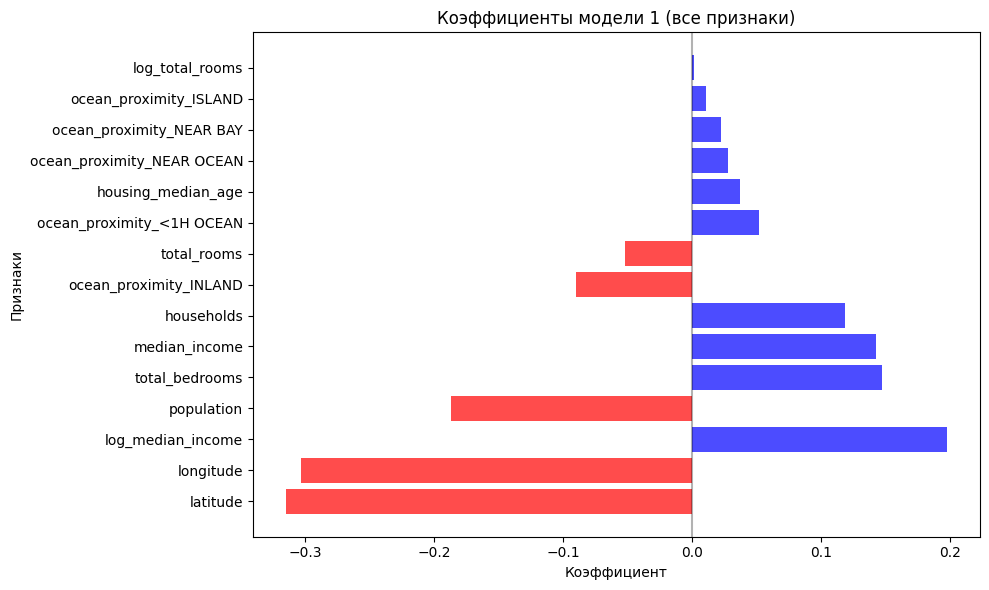

In [26]:
# Модель 1
model1 = LinearRegression()
model1.fit(X_scaled_df, y)  # Используем y (логарифмированная цена), а не y_processed
y_pred1 = model1.predict(X_scaled_df)

print("Метрики для всей выборки:")
mae1, mape1, r2_1, mse1, rmse1 = calculate_metrics(y, y_pred1)  # Тоже используем y

coefficients1 = plot_coefficients(model1, X_scaled_df.columns, "Коэффициенты модели 1 (все признаки)")

Модель показывает нормальные результаты: объясняет 68% изменчивости цен со средней ошибкой всего 2%. Это свидетельствует о сильной связи между выбранными признаками и стоимостью жилья.

In [28]:
top_feature = coefficients1.iloc[0]['feature']
top_coef = coefficients1.iloc[0]['coefficient']
print(f"Самый важный признак: {top_feature} (коэффициент: {top_coef:.3f})")

Самый важный признак: latitude (коэффициент: -0.315)


Метрики для обучающей выборки:
MAE = 0.242
MAPE = 0.020 (2.0%)
R² = 0.682
MSE = 0.103
RMSE = 0.321
Метрики для тестовой выборки:
MAE = 0.249
MAPE = 0.021 (2.1%)
R² = 0.662
MSE = 0.110
RMSE = 0.331


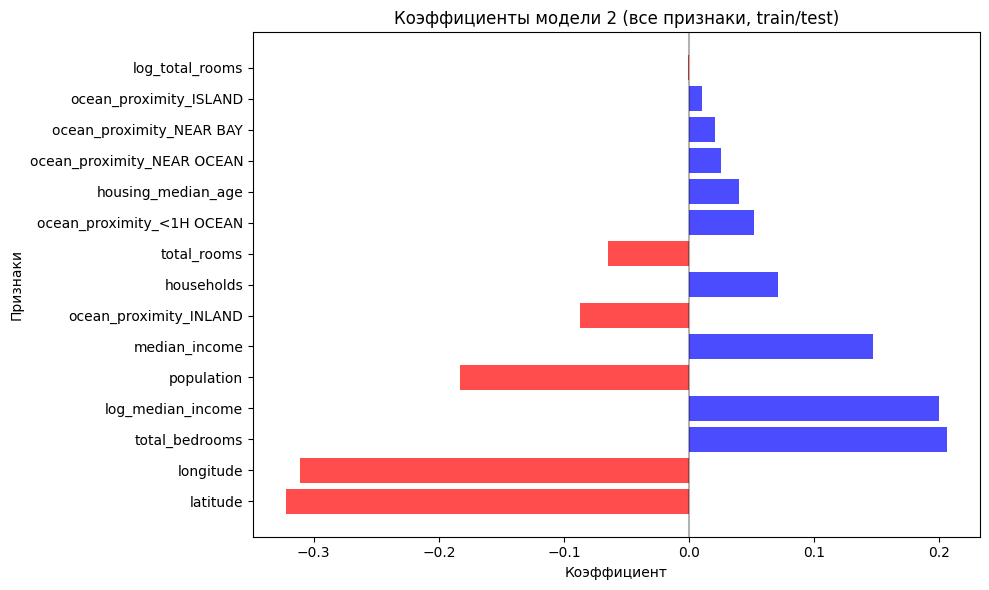

In [29]:
# Модель 2

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train, y_train)

# Предсказания на обучающей и тестовой выборках
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

print("Метрики для обучающей выборки:")
mae_train2, mape_train2, r2_train2, mse_train2, rmse_train2 = calculate_metrics(y_train, y_train_pred2)

print("Метрики для тестовой выборки:")
mae_test2, mape_test2, r2_test2, mse_test2, rmse_test2 = calculate_metrics(y_test, y_test_pred2)

coefficients2 = plot_coefficients(model2, X_scaled_df.columns, "Коэффициенты модели 2 (все признаки, train/test)")

Модель показывает высокую и стабильную предсказательную способность. Незначительное различие между метриками на обучающей и тестовой выборках говорит об отсутствии переобучения и хорошей обобщающей способности модели.

Используем отобранные признаки: ['median_income', 'latitude', 'housing_median_age', 'total_rooms', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
Размерность X_top_best: (20640, 9)
Метрики для всей выборки (отобранные признаки):
MAE = 0.270
MAPE = 0.022 (2.2%)
R² = 0.621
MSE = 0.123
RMSE = 0.350


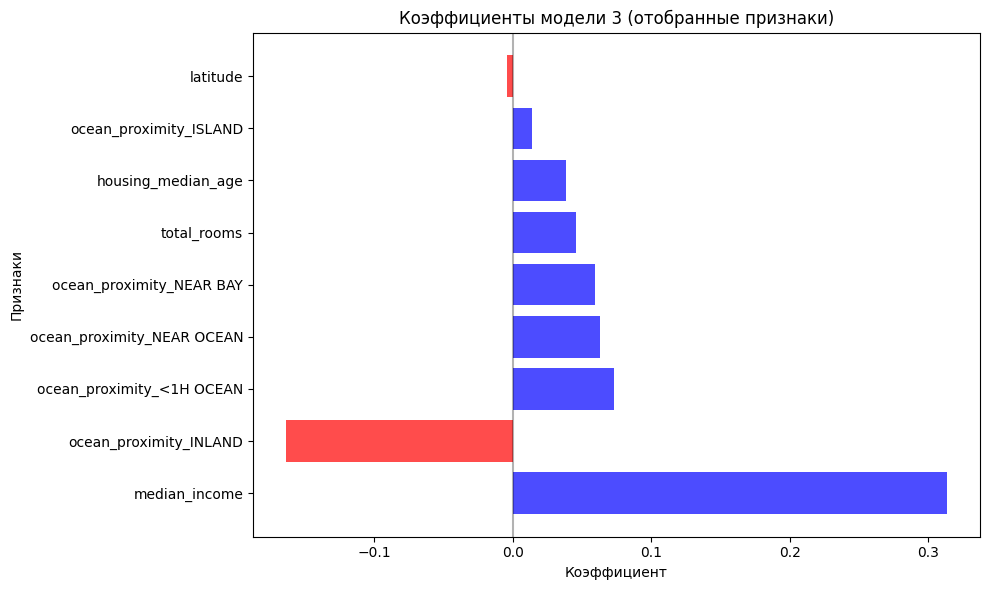


Коэффициенты модели 3:
                      feature  coefficient
0               median_income     0.313690
5      ocean_proximity_INLAND    -0.163932
4   ocean_proximity_<1H OCEAN     0.073247
8  ocean_proximity_NEAR OCEAN     0.063041
7    ocean_proximity_NEAR BAY     0.059182
3                 total_rooms     0.045796
2          housing_median_age     0.038369
6      ocean_proximity_ISLAND     0.014101
1                    latitude    -0.003905


In [30]:
# Модель 3
best_features_corrected = [
    'median_income', 'latitude', 'housing_median_age', 'total_rooms',
    'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
    'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
    'ocean_proximity_NEAR OCEAN'
]

print(f"Используем отобранные признаки: {best_features_corrected}")

# Создаем матрицу только с выбранными признаками
X_top_best = X_scaled_df[best_features_corrected]

print(f"Размерность X_top_best: {X_top_best.shape}")


model3 = LinearRegression()
model3.fit(X_top_best, y)
y_pred3 = model3.predict(X_top_best)

print("Метрики для всей выборки (отобранные признаки):")
mae3, mape3, r2_3, mse3, rmse3 = calculate_metrics(y, y_pred3)

coefficients3 = plot_coefficients(model3, best_features_corrected, "Коэффициенты модели 3 (отобранные признаки)")

print("\nКоэффициенты модели 3:")
print(coefficients3)

Модель на отобранных признаках показывает незначительное снижение качества по сравнению с моделью на всех признаках. Это подтверждает адекватность отбора признаков.

Размерность X_top_best_train: (16512, 9)
Размерность X_top_best_test: (4128, 9)
Метрики для обучающей выборки (отобранные признаки):
MAE = 0.270
MAPE = 0.022 (2.2%)
R² = 0.623
MSE = 0.122
RMSE = 0.349
Метрики для тестовой выборки (отобранные признаки):
MAE = 0.272
MAPE = 0.023 (2.3%)
R² = 0.614
MSE = 0.125
RMSE = 0.354


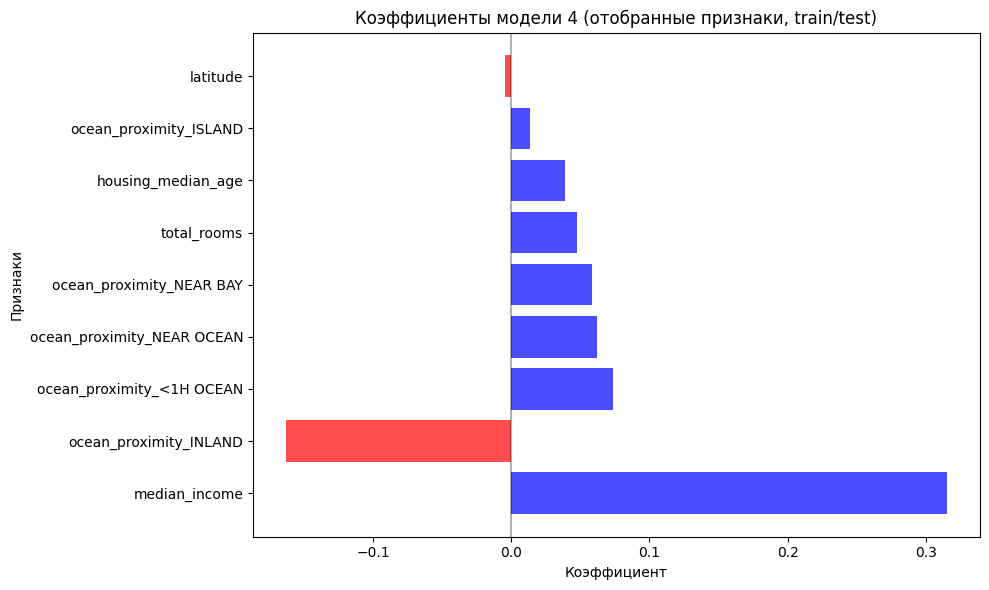


Коэффициенты модели 4:
                      feature  coefficient
0               median_income     0.315271
5      ocean_proximity_INLAND    -0.163025
4   ocean_proximity_<1H OCEAN     0.073558
8  ocean_proximity_NEAR OCEAN     0.061835
7    ocean_proximity_NEAR BAY     0.058663
3                 total_rooms     0.047642
2          housing_median_age     0.039121
6      ocean_proximity_ISLAND     0.013455
1                    latitude    -0.004306


In [31]:
# Модель 4

# Создаем train/test версии с нашими признаками
X_top_best_train = X_train[best_features_corrected]
X_top_best_test = X_test[best_features_corrected]

print(f"Размерность X_top_best_train: {X_top_best_train.shape}")
print(f"Размерность X_top_best_test: {X_top_best_test.shape}")

model4 = LinearRegression()
model4.fit(X_top_best_train, y_train)

y_train_pred4 = model4.predict(X_top_best_train)
y_test_pred4 = model4.predict(X_top_best_test)

print("Метрики для обучающей выборки (отобранные признаки):")
mae_train4, mape_train4, r2_train4, mse_train4, rmse_train4 = calculate_metrics(y_train, y_train_pred4)

print("Метрики для тестовой выборки (отобранные признаки):")
mae_test4, mape_test4, r2_test4, mse_test4, rmse_test4 = calculate_metrics(y_test, y_test_pred4)

coefficients4 = plot_coefficients(model4, best_features_corrected, "Коэффициенты модели 4 (отобранные признаки, train/test)")

print("\nКоэффициенты модели 4:")
print(coefficients4)

Незначительное различие между метриками на обучающей и тестовой выборках  подтверждает отсутствие переобучения. Отобранные признаки показывают сопоставимое качество с моделью на всех признаках, что свидетельствует об их адекватности и достаточности для прогнозирования.

In [32]:
print("Сравнение всех моделей")

# Создаем сравнительную таблицу
comparison = pd.DataFrame({
    'Модель': [
        'М1: Все признаки (вся выборка)',
        'М2: Все признаки (train)',
        'М2: Все признаки (test)',
        'М3: Отобранные (вся выборка)',
        'М4: Отобранные (train)',
        'М4: Отобранные (test)'
    ],
    'MAE': [mae1, mae_train2, mae_test2, mae3, mae_train4, mae_test4],
    'MAPE': [mape1, mape_train2, mape_test2, mape3, mape_train4, mape_test4],
    'R²': [r2_1, r2_train2, r2_test2, r2_3, r2_train4, r2_test4],
    'RMSE': [rmse1, rmse_train2, rmse_test2, rmse3, rmse_train4, rmse_test4]
})

print("Сравнительная таблица метрик:")
print(comparison.round(3))


# Анализ переобучения Модели 2
diff_r2_2 = r2_train2 - r2_test2
print(f"Модель 2 (все признаки):")
print(f"  R² train: {r2_train2:.3f}, R² test: {r2_test2:.3f}, Разница: {diff_r2_2:.3f}")
if diff_r2_2 > 0.1:
    print("  Возможно переобучение (разница R² > 0.1)")
else:
    print("  Переобучения нет")

# Анализ переобучения Модели 4
diff_r2_4 = r2_train4 - r2_test4
print(f"\nМодель 4 (отобранные признаки):")
print(f"  R² train: {r2_train4:.3f}, R² test: {r2_test4:.3f}, Разница: {diff_r2_4:.3f}")
if diff_r2_4 > 0.1:
    print("  Возможно переобучение (разница R² > 0.1)")
else:
    print("  Переобучения нет")


Сравнение всех моделей
Сравнительная таблица метрик:
                           Модель    MAE   MAPE     R²   RMSE
0  М1: Все признаки (вся выборка)  0.244  0.020  0.679  0.323
1        М2: Все признаки (train)  0.242  0.020  0.682  0.321
2         М2: Все признаки (test)  0.249  0.021  0.662  0.331
3    М3: Отобранные (вся выборка)  0.270  0.022  0.621  0.350
4          М4: Отобранные (train)  0.270  0.022  0.623  0.349
5           М4: Отобранные (test)  0.272  0.023  0.614  0.354
Модель 2 (все признаки):
  R² train: 0.682, R² test: 0.662, Разница: 0.020
  Переобучения нет

Модель 4 (отобранные признаки):
  R² train: 0.623, R² test: 0.614, Разница: 0.009
  Переобучения нет
